# Retail Sales Analysis 

## 1. Data Collection

In [7]:
import kaggle
!kaggle datasets download --force -d abdullah0a/retail-sales-data-with-seasonal-trends-and-marketing

Dataset URL: https://www.kaggle.com/datasets/abdullah0a/retail-sales-data-with-seasonal-trends-and-marketing
License(s): MIT
100%|████████████████████████████████████████| 610k/610k [00:00<00:00, 1.06MB/s]
100%|████████████████████████████████████████| 610k/610k [00:00<00:00, 1.06MB/s]


In [8]:
import zipfile
zipfile_name = 'retail-sales-data-with-seasonal-trends-and-marketing.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

## 2. Data Cleaning and Initial Data Exploration

In [9]:
import pandas as pd
df = pd.read_csv('Retail_sales.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB


In [11]:
df.isnull().sum()

Store ID                 0
Product ID               0
Date                     0
Units Sold               0
Sales Revenue (USD)      0
Discount Percentage      0
Marketing Spend (USD)    0
Store Location           0
Product Category         0
Day of the Week          0
Holiday Effect           0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

There is no null data and duplicated data.

In [13]:
# Change `Date` to Date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [14]:
# Verify `Date` data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Store ID               30000 non-null  object        
 1   Product ID             30000 non-null  int64         
 2   Date                   30000 non-null  datetime64[ns]
 3   Units Sold             30000 non-null  int64         
 4   Sales Revenue (USD)    30000 non-null  float64       
 5   Discount Percentage    30000 non-null  int64         
 6   Marketing Spend (USD)  30000 non-null  int64         
 7   Store Location         30000 non-null  object        
 8   Product Category       30000 non-null  object        
 9   Day of the Week        30000 non-null  object        
 10  Holiday Effect         30000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 2.3+ MB


`Date` data type has been updated to `datetime64`.

In [15]:
# Initial Data Exploration
df.head()

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


In [16]:
df.describe()

,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD)
count,3.000000e+04,30000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.461294e+07,2022-12-31 15:51:24.480000256,6.161967,2749.509593,2.973833,49.944033
min,3.636541e+06,2022-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2.228600e+07,2022-07-02 00:00:00,4.000000,882.592500,0.000000,0.000000
50%,4.002449e+07,2023-01-01 00:00:00,6.000000,1902.420000,0.000000,1.000000
75%,6.559352e+07,2023-07-03 00:00:00,8.000000,3863.920000,0.000000,100.000000
max,9.628253e+07,2024-01-01 00:00:00,56.000000,27165.880000,20.000000,199.000000
std,2.779759e+07,NaN,3.323929,2568.639288,5.974530,64.401655


In [17]:
df.shape

(30000, 11)

In [18]:
df.columns

Index(['Store ID', 'Product ID', 'Date', 'Units Sold', 'Sales Revenue (USD)',
       'Discount Percentage', 'Marketing Spend (USD)', 'Store Location',
       'Product Category', 'Day of the Week', 'Holiday Effect'],
      dtype='object')

Check number of item in the categorical columns.

In [19]:
df['Store ID'].nunique()

1

In [20]:
df['Store Location'].nunique()

243

In [21]:
df['Product ID'].nunique()

42

In [22]:
df['Product Category'].nunique()

4

**Summary:**
1. No null value or duplicated value is found in the dataset.
2. `Date` column data type is updated to `datetime64`.
3. There are 30,000 rows and 11 columns in the dataset.
4. There is only one unique value in `Store ID`, hence the column can be ignored and dropped.

In [23]:
# Drop column 'Store ID'
df = df.drop('Store ID', axis=1)

## 3. Exploratory data Analysis

In [24]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df.columns

Index(['Product ID', 'Date', 'Units Sold', 'Sales Revenue (USD)',
       'Discount Percentage', 'Marketing Spend (USD)', 'Store Location',
       'Product Category', 'Day of the Week', 'Holiday Effect'],
      dtype='object')

In [26]:
# Identify significant numerical and categorical variables
numerical_col = ['Units Sold', 'Sales Revenue (USD)', 'Marketing Spend (USD)']
categorical_col = ['Product Category', 'Discount Percentage', 'Day of the Week', 'Holiday Effect']

In [27]:
# Set plot style
plt.style.use('ggplot')

### 3.1. Univariate Analysis

#### 3.1.1. Distribution of Numerical Variables

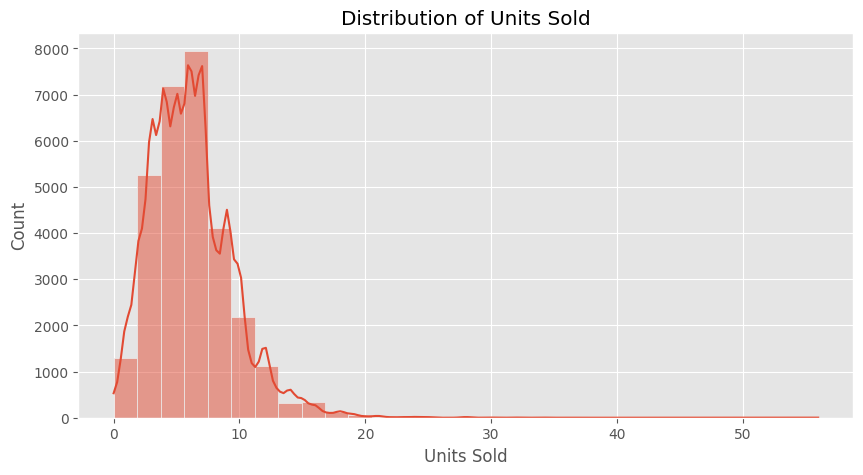

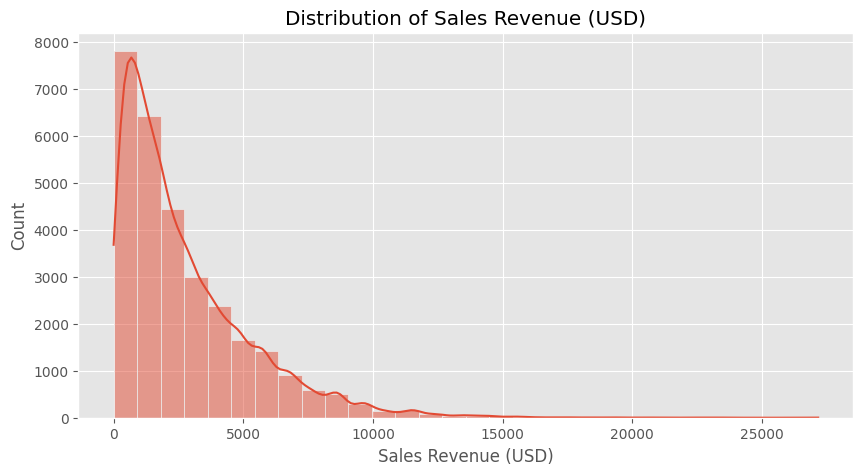

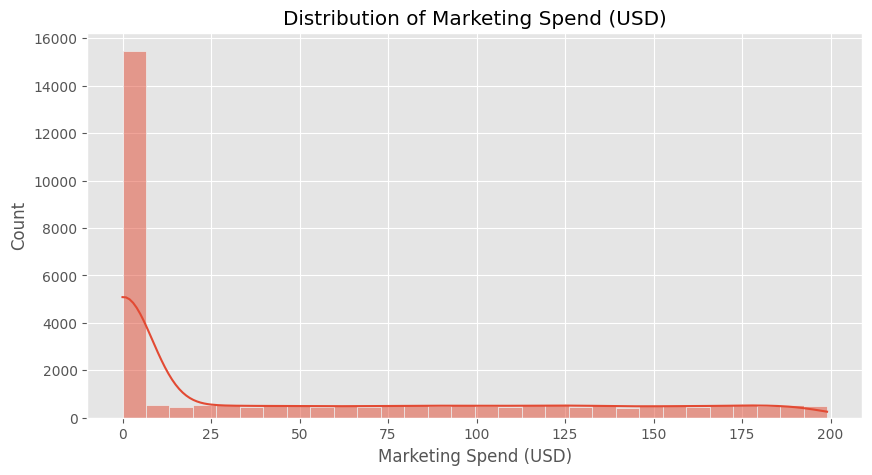

In [28]:
for col in numerical_col:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#### 3.1.2. Count plot of categorical variables

Skip this part because there is no valuable information from categorical variables count.

### 3.2. Bivariate Analysis

#### 3.2.1. Box plots of numerical variables vs. categorical variables

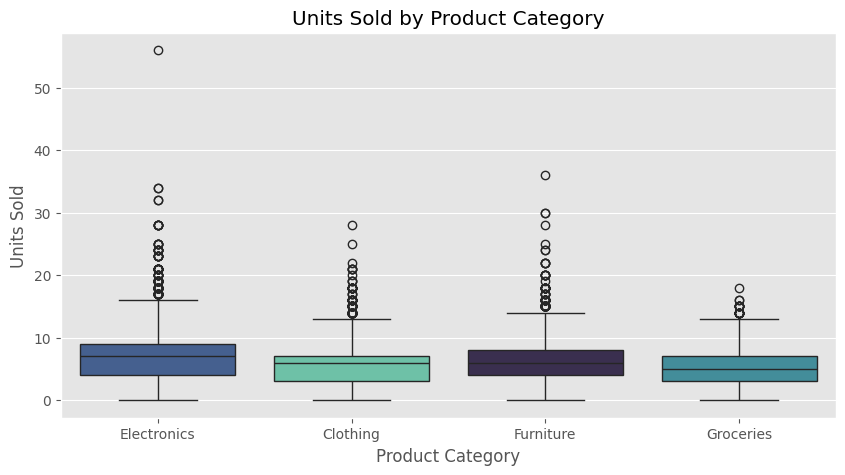

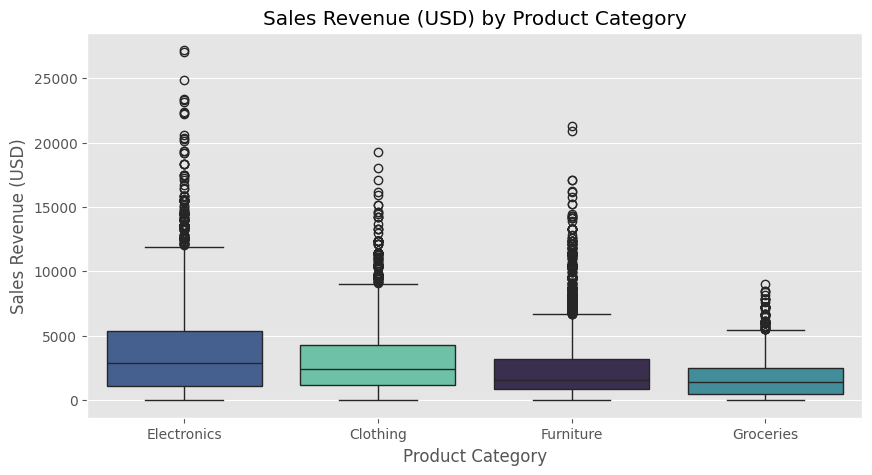

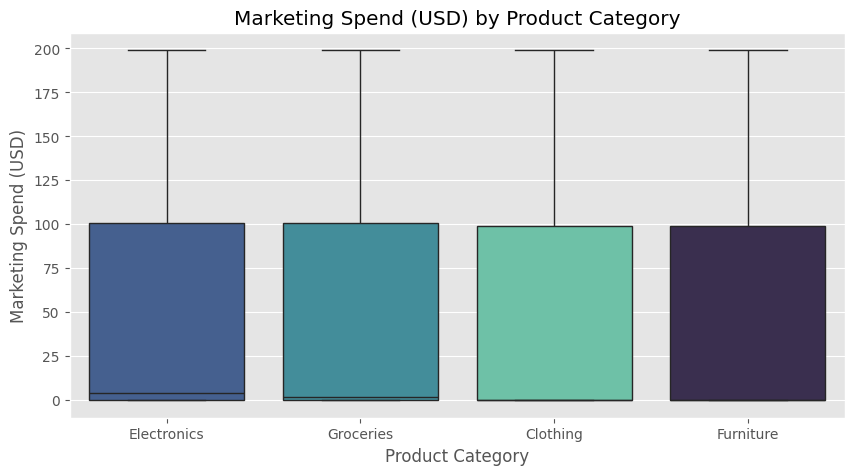

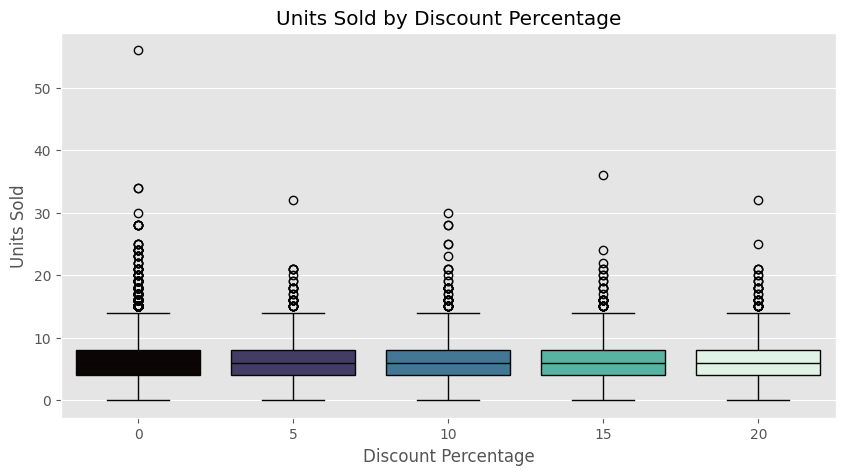

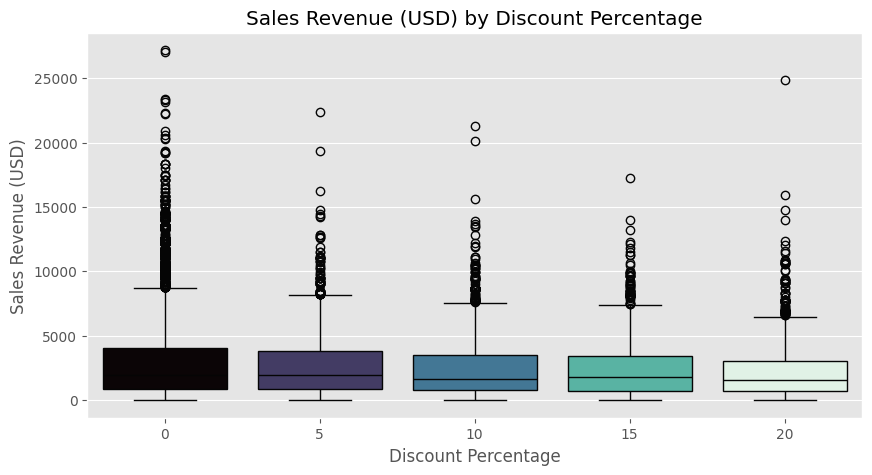

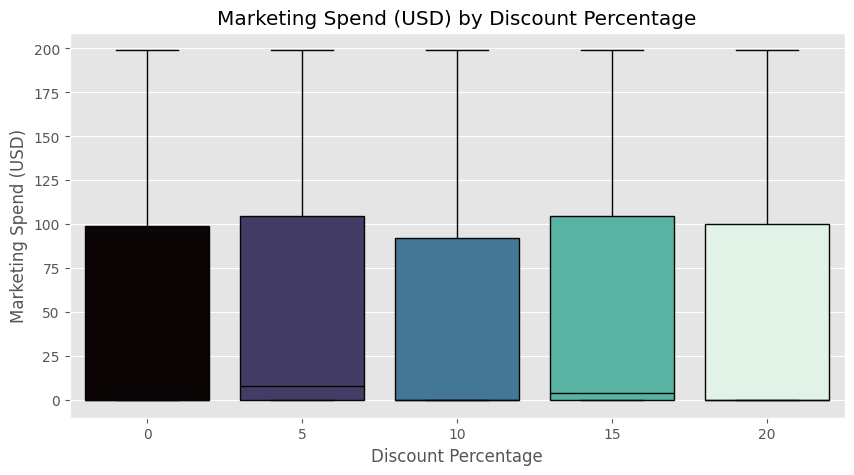

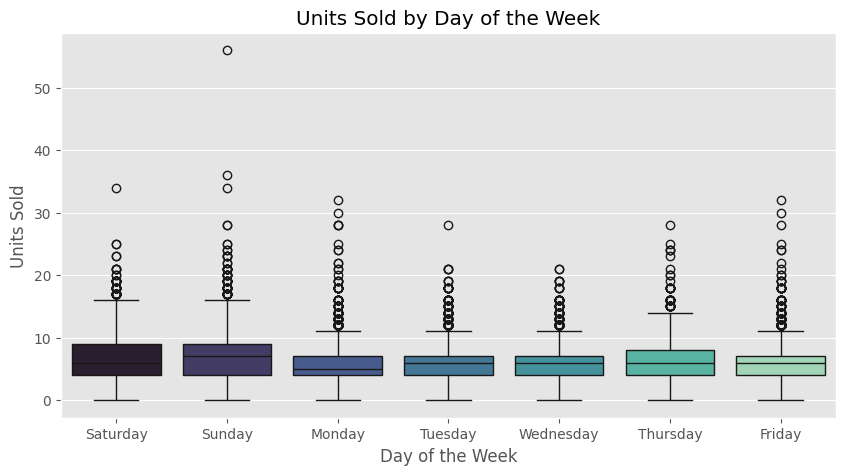

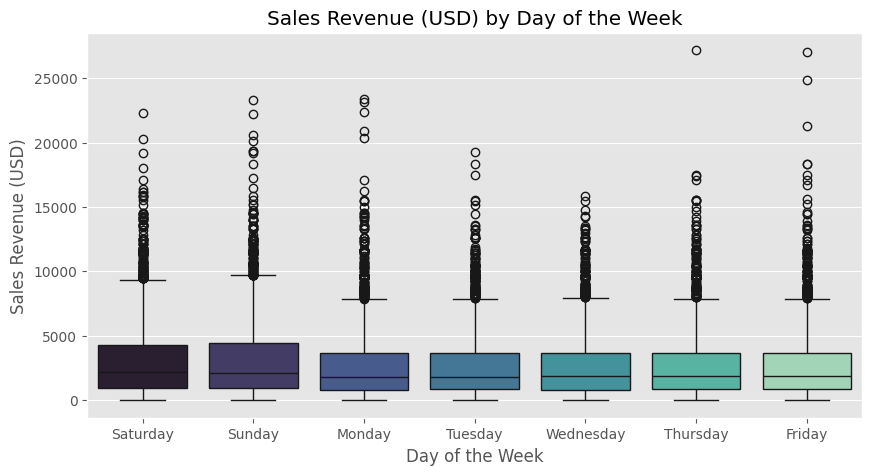

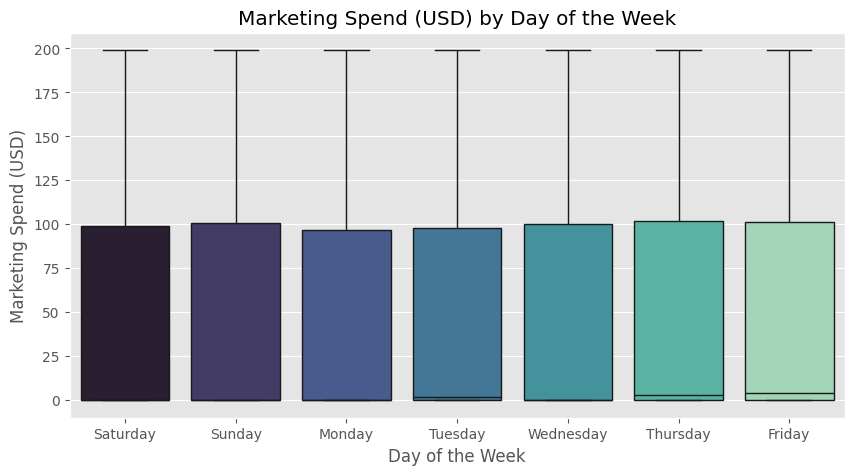

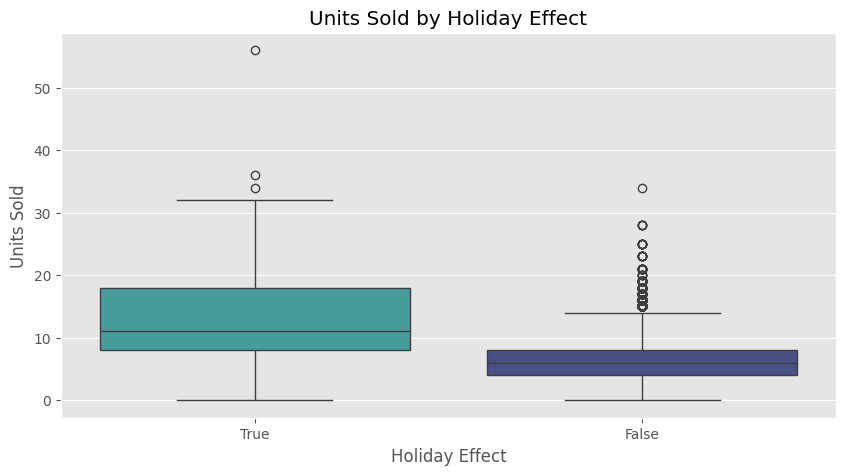

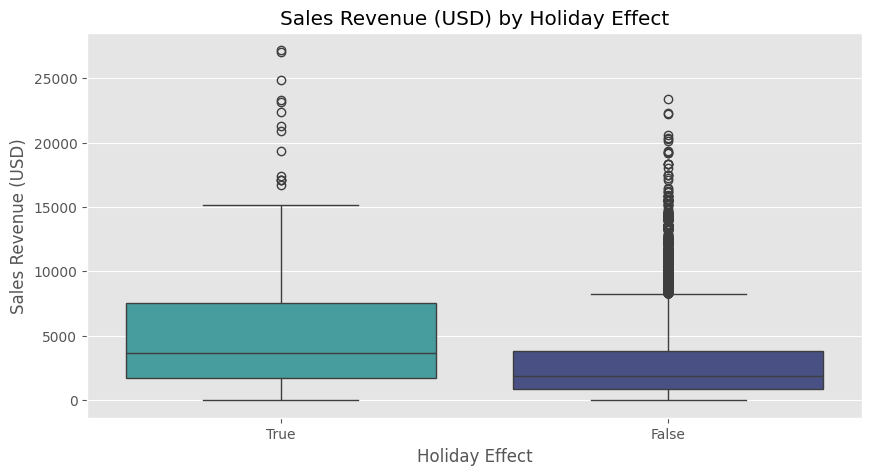

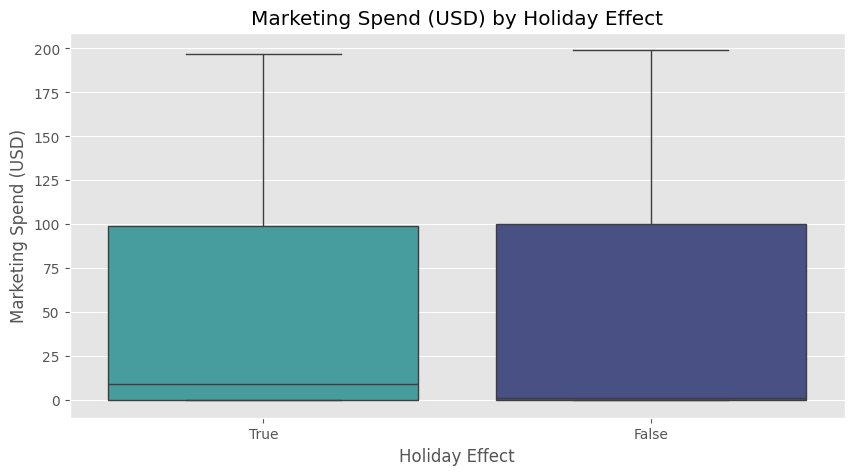

In [29]:
for col_c in categorical_col:
    for col_n in numerical_col:
        plt.figure(figsize=(10,5)) 
        if col_c == 'Day of the Week' or col_c == 'Discount Percentage':
            sns.boxplot(x=df[col_c], y=df[col_n], palette='mako', hue=df[col_c], legend=False)
        else:
            median_values = df.groupby(col_c)[col_n].median()
            sorted_categories = median_values.sort_values(ascending=False).index
            sns.boxplot(x=df[col_c], y=df[col_n], order=sorted_categories, palette='mako', hue=df[col_c], legend=False)
        plt.title(f'{col_n} by {col_c}')
        plt.xlabel(col_c)
        plt.ylabel(col_n)
        plt.show()

### 3.3. Multivariate Analysis

#### 3.3.1. Pairplot of numerical variales

<Figure size 1000x500 with 0 Axes>

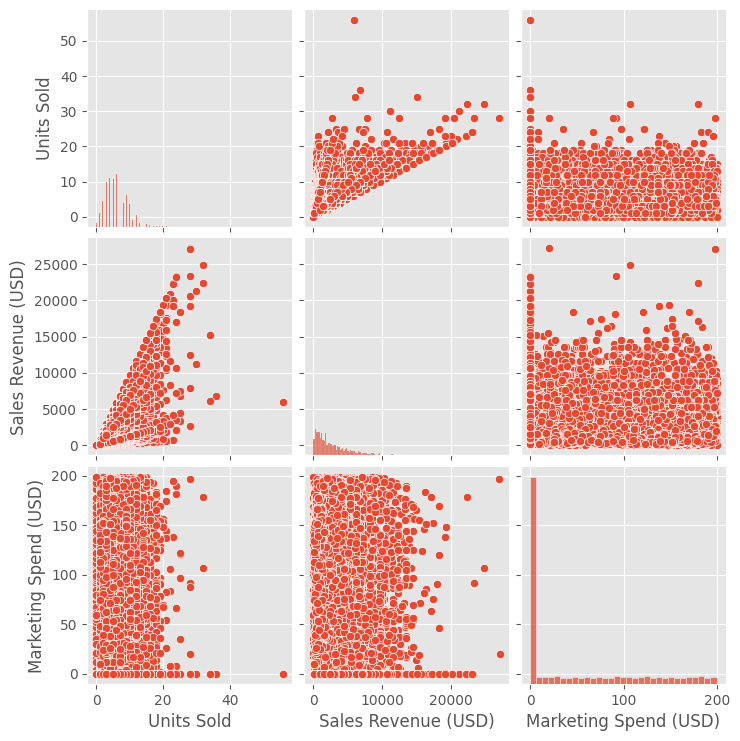

In [30]:
plt.figure(figsize=(10,5))
sns.pairplot(df[numerical_col])
plt.show()

#### 3.3.2. Heatmap of numerical variables

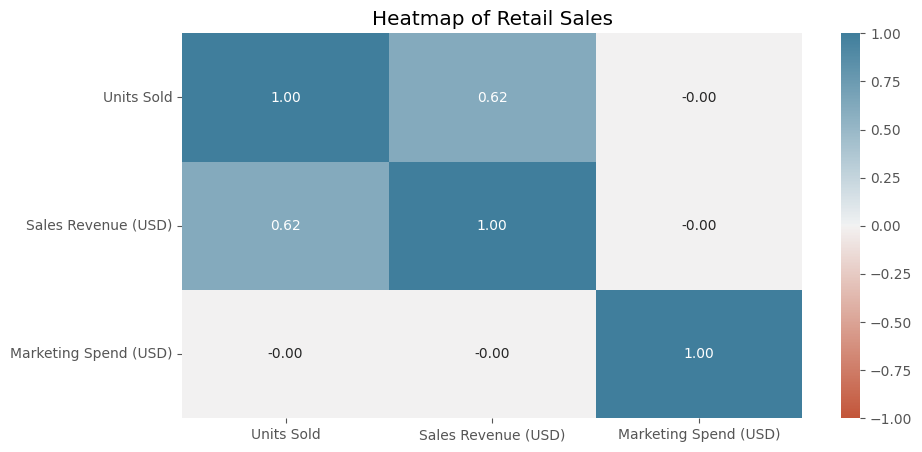

In [31]:
# corr = df.select_dtypes(include=[np.number])
corr = df[numerical_col].corr()
plt.figure(figsize=(10, 5))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, vmin=-1, fmt='.2f')
plt.title('Heatmap of Retail Sales')
plt.show()

### 3.4. Time Series Analysis

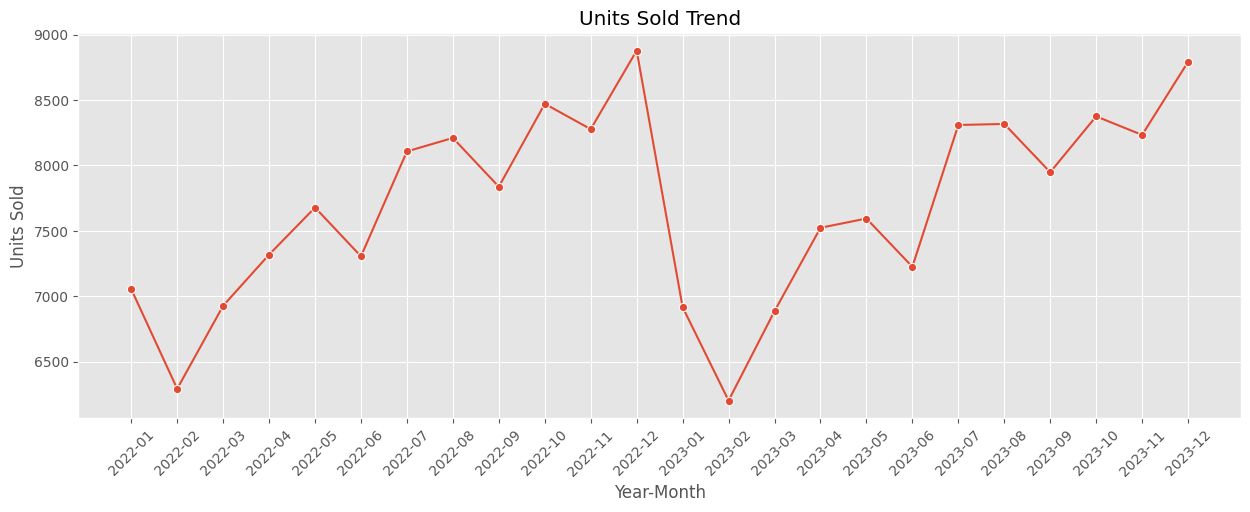

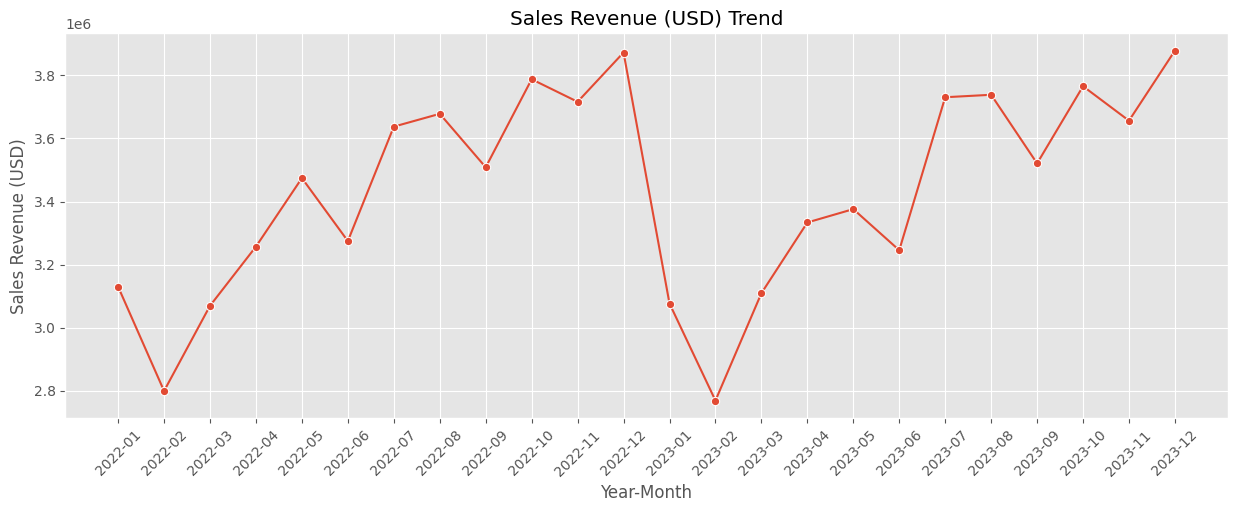

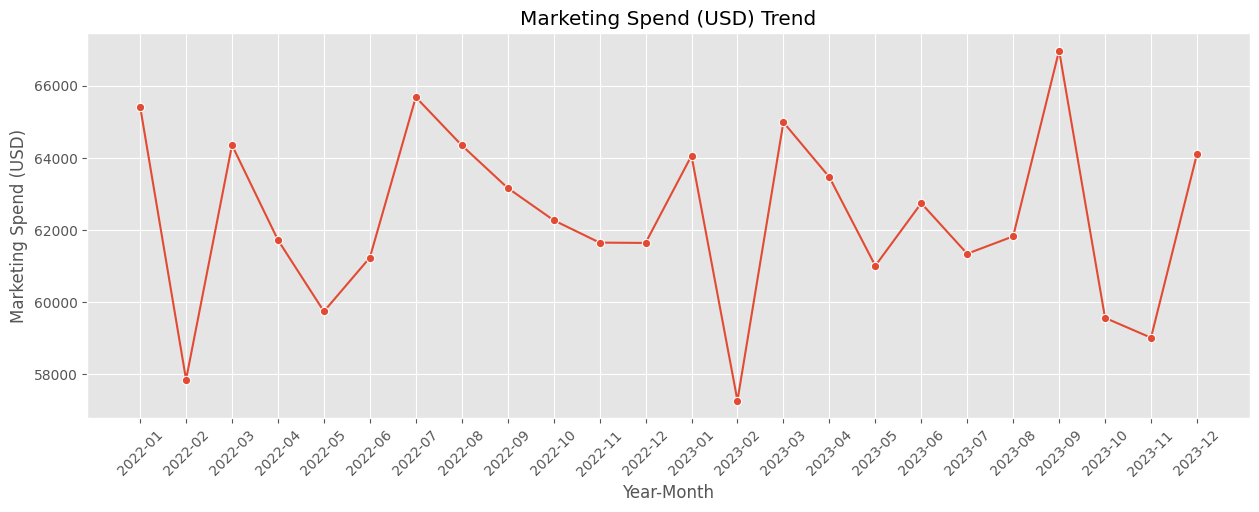

In [32]:
# Analysis by month
for col in numerical_col:
    plt.figure(figsize=(15, 5))
    df['Year-Month'] = df['Date'].dt.to_period('M')
    df_grouped = df.groupby('Year-Month')[col].sum().reset_index()
    df_grouped['Year-Month'] = df_grouped['Year-Month'].astype(str)
    
    # Exclude 2024 January because there is only one day data in that month
    df_grouped = df_grouped[:-1]
    sns.lineplot(data=df_grouped, x='Year-Month', y=col, marker='o')
    plt.title(f'{col} Trend')
    plt.xlabel('Year-Month')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()

**EDA Observation:**
1. The distributions of `Units Sold`, `Sales Revenue (USD)`, and `Marketing Spend (USD)` are right-skewed. 
2. Among the product categories, `Electronics` leads with the highest units sold and sales revenue, followed by `Clothing`, `Furniture`, and `Groceries`. 
3. In terms of marketing spend, `Electronics` also tops the list, followed by `Groceries`, then `Clothing`, and `Furniture`.
4. The discount percentage has minimal impact on both units sold and sales revenue. 
5. There is a slightly higher number of units sold and increased sales revenue on weekends (Saturday and Sunday) compared to weekdays, though the difference is not significant. 
6. Sales and units sold tend to perform better during holidays, whereas marketing spend appears unaffected by holidays.
7. From the correlation analysis, only `Sales Revenue (USD)` and `Units Sold` show a notable linear relationship. `Marketing Spend (USD)` does not show a strong correlation with either `Sales Revenue (USD)` or `Units Sold`, suggesting that marketing spend has a limited impact on revenue. This is further supported by the heatmap, where `Marketing Spend (USD)` shows a near-zero correlation with both sales revenue and units sold.
8. The time series analysis reveals that `Sales Revenue (USD)` reaches its lowest point in February, followed by a consistent rise, peaking in December, likely due to year-end seasonal events. Meanwhile, `Marketing Spend (USD)` also dips in February but remains relatively stable, fluctuating around $62,000 throughout the year.

## 4. Data Modeling

### 4.1. Data Preprocessing

In [41]:
# Define Libraries

from sklearn.model_selection import train_test_split, KFold, cross_val_score,  GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [42]:
# Define features and target variable
# 'Sales Revenue (USD)' and 'Units Sold' are target variables. 
#   Since 'Sales Revenue (USD)' is corrarelated with 'Sales Revenue (USD)' and 
#   'Units Sold' is not the main prediction target, 
#   only 'Sales Revenue (USD)' is defined as the target variable.

X = df[['Product ID','Store Location', 'Product Category', 'Day of the Week',
        'Discount Percentage', 'Marketing Spend (USD)', 'Holiday Effect']]
y = df['Sales Revenue (USD)']

In [43]:
# Split data to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Preprocess variables
numerical_col = ['Marketing Spend (USD)']
categorical_col = ['Product ID', 'Store Location', 'Discount Percentage', 'Product Category', 'Day of the Week']
bool_col = ['Holiday Effect']

preprocessor = ColumnTransformer (
    transformers = [
        ('num', MinMaxScaler(), numerical_col),
        ('bool', 'passthrough', bool_col),
        ('cat', OneHotEncoder(), categorical_col)
    ]
)

### 4.2. Model Building and Running

In [45]:
# Define function for data modeling

results = []

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Train data
    pipeline.fit(X_train, y_train)

    # Predict using test data
    y_pred = pipeline.predict(X_test)

    # Plot predictions vs actuals 
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted', color='orange')
    plt.xlabel('Actual Sales Revenue (USD)')
    plt.ylabel('Predicted Sales Revenue (USD)')
    plt.title(f'{model_name}: Predicted vs. Actual Sales Revenue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label='Perfect Prediction')
    plt.legend()
    plt.show()
    
    # Calculate evaluation metrics of R² and RMSE
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print results
    print(f"{model_name} Model:")
    print(f"R²: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}\n")
    
    # Save to results list
    results.append({'Model': model_name, 'R²': r2, 'RMSE': rmse, 'MAE': mae})

In [57]:
# Define cross validation function for data modeling

def cross_validate_model(model, X, y, model_name):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Initialize k-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

    # Perform cross-validation
    scores_r2 = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')

    # Print the results
    print(f'Cross validation:')
    print(f"R² scores for each fold: {scores_r2}")
    print(f"Average R² score: {np.mean(scores_r2):.3f}")


In [46]:
# Define models

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0),  
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Support Vector Regression': SVR(kernel='rbf', C=100, gamma=0.1),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(learning_rate=0.1),
}

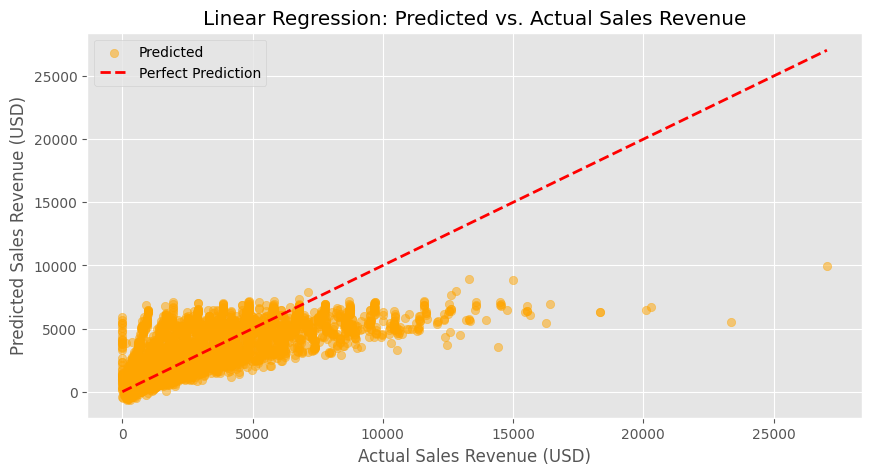

Linear Regression Model:
R²: 0.542
RMSE: 1753.735
MAE: 1144.072

Cross validation:
R² scores for each fold: [0.54167481 0.52473535 0.54413685 0.52638384 0.53726258]
Average R² score: 0.535


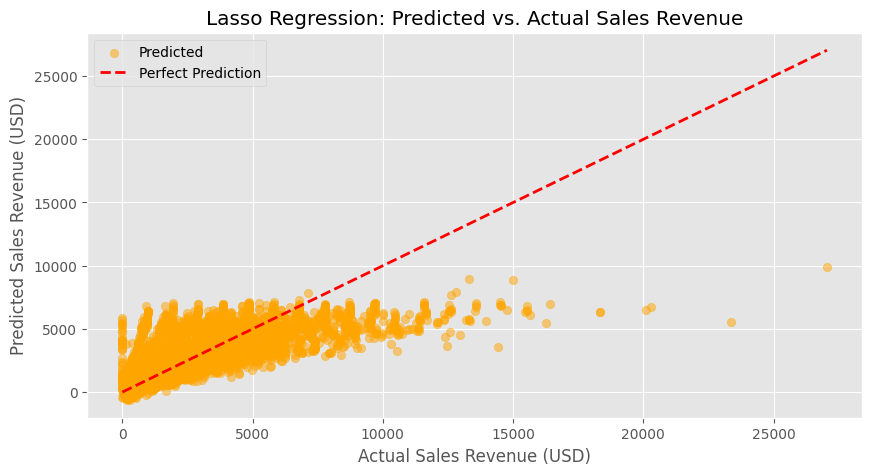

Lasso Regression Model:
R²: 0.542
RMSE: 1752.215
MAE: 1141.092

Cross validation:
R² scores for each fold: [0.54246899 0.52563559 0.54510203 0.52707815 0.53829854]
Average R² score: 0.536


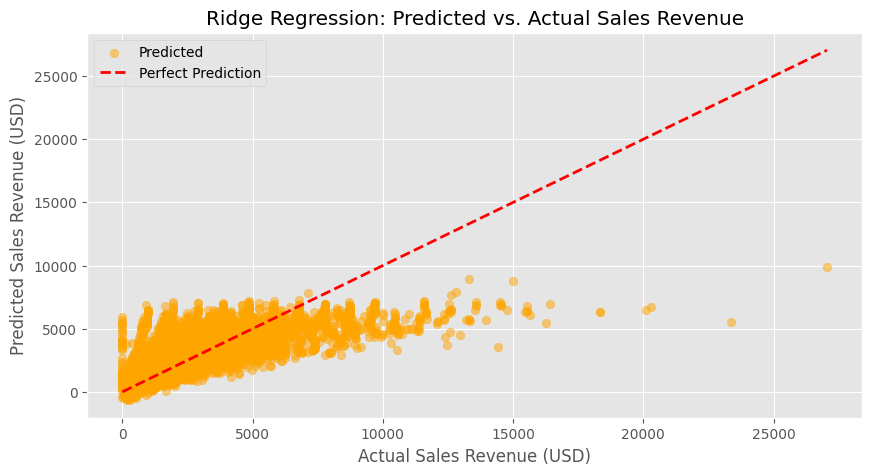

Ridge Regression Model:
R²: 0.542
RMSE: 1753.603
MAE: 1143.667

Cross validation:
R² scores for each fold: [0.54174398 0.52487326 0.5442239  0.52644357 0.53741234]
Average R² score: 0.535


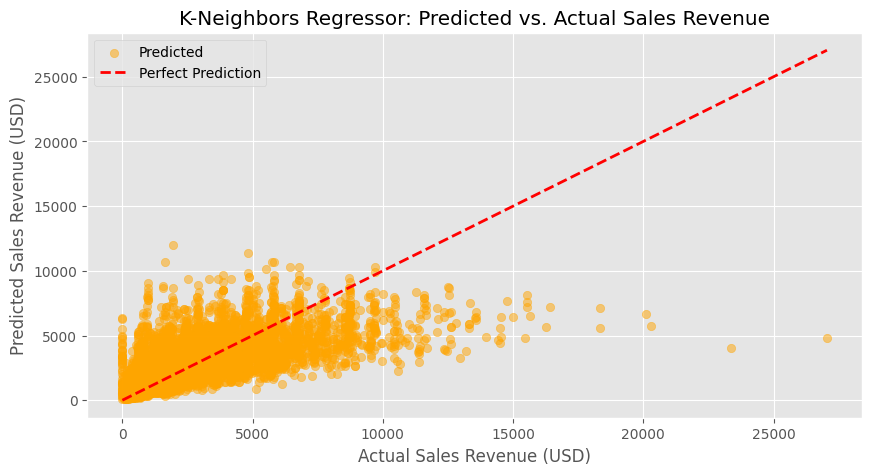

K-Neighbors Regressor Model:
R²: 0.445
RMSE: 1930.370
MAE: 1246.313

Cross validation:
R² scores for each fold: [0.44037787 0.42580327 0.4476123  0.41593811 0.42446767]
Average R² score: 0.431


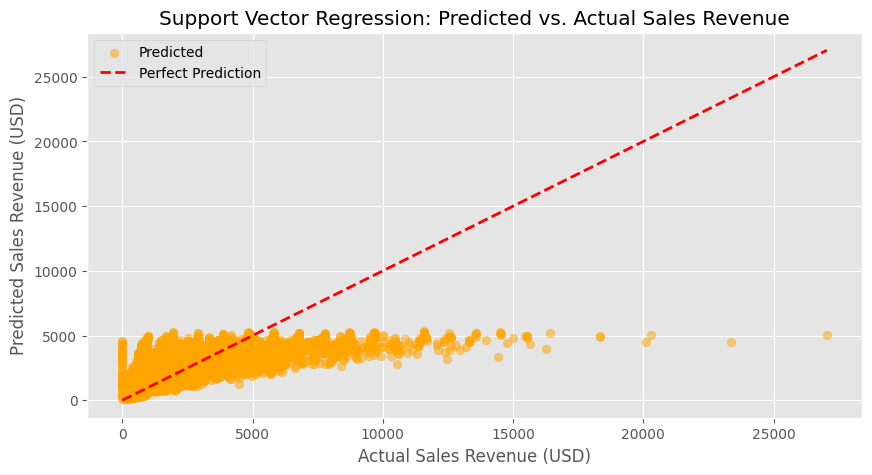

Support Vector Regression Model:
R²: 0.477
RMSE: 1874.184
MAE: 1154.510

Cross validation:
R² scores for each fold: [0.47655633 0.46900036 0.47622972 0.47202217 0.48753865]
Average R² score: 0.476


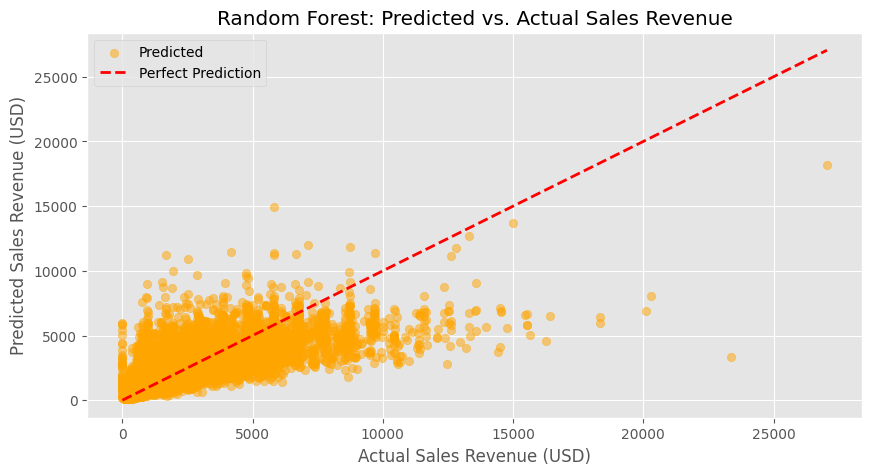

Random Forest Model:
R²: 0.471
RMSE: 1884.722
MAE: 1207.016

Cross validation:
R² scores for each fold: [0.46986184 0.43531077 0.46559958 0.43124281 0.46147749]
Average R² score: 0.453


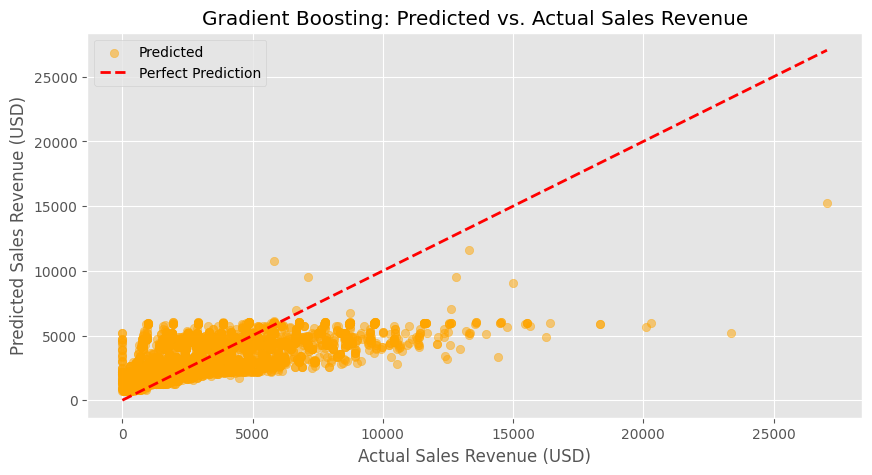

Gradient Boosting Model:
R²: 0.505
RMSE: 1823.408
MAE: 1245.237

Cross validation:
R² scores for each fold: [0.50447089 0.48066535 0.50255959 0.49092423 0.50636148]
Average R² score: 0.497


In [58]:
# Evaluate the models
for model_name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test, model_name)
    cross_validate_model(model, X, y, model_name)

# Save results to DataFrame
df_results = pd.DataFrame(results)

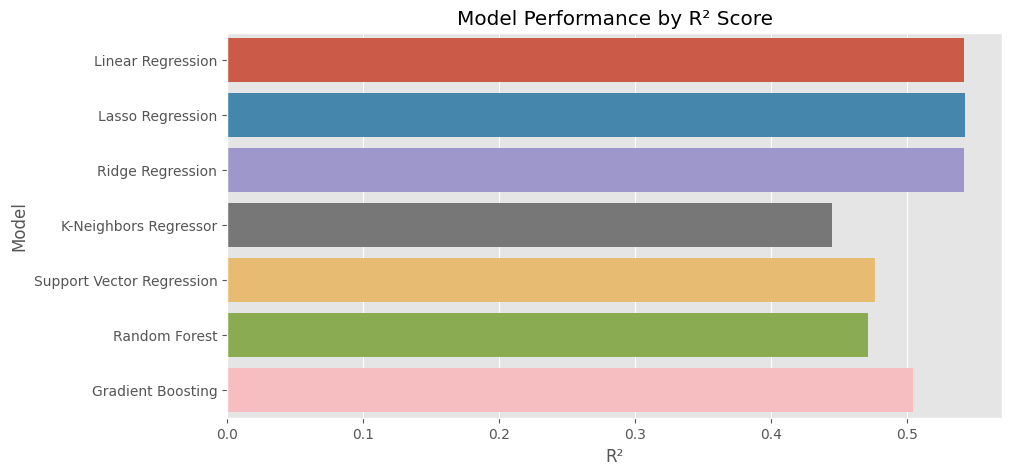

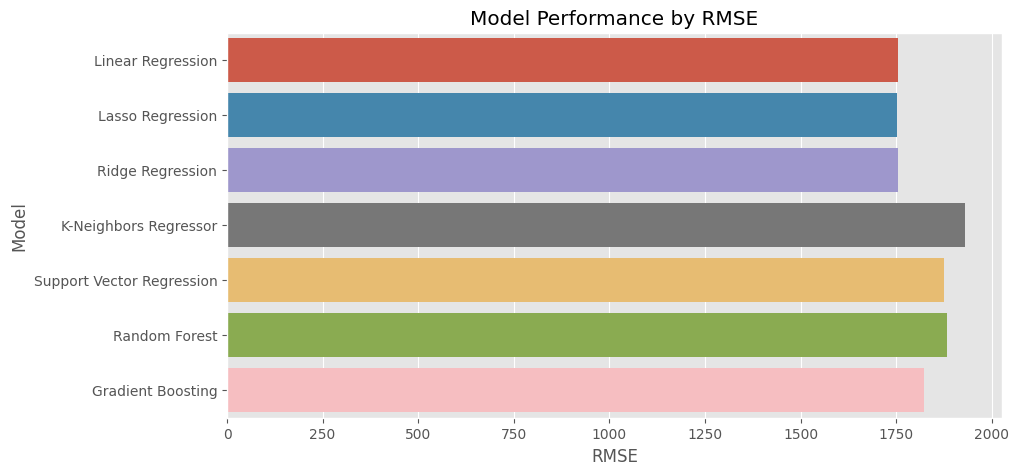

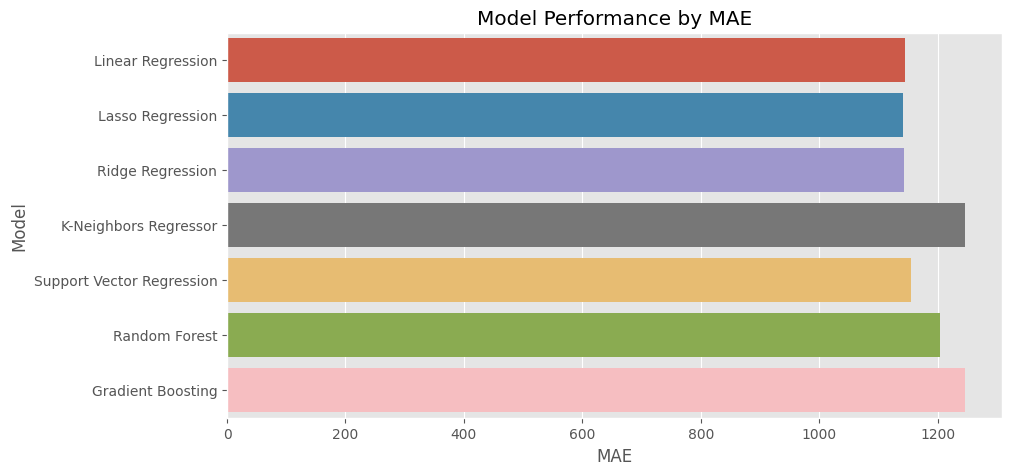

In [48]:
# Plot R² chart
plt.figure(figsize=(10, 5))
sns.barplot(x='R²', y='Model', data=df_results, hue='Model')
plt.title('Model Performance by R² Score')
plt.show()

# Plot RMSE chart
plt.figure(figsize=(10, 5))
sns.barplot(x='RMSE', y='Model', data=df_results, hue='Model')
plt.title('Model Performance by RMSE')
plt.show()

# Plot MAE chart
plt.figure(figsize=(10, 5))
sns.barplot(x='MAE', y='Model', data=df_results, hue='Model')
plt.title('Model Performance by MAE')
plt.show()

In [61]:
# Hyperparameter tuning for Lasso Regression

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', None)
])

# Define the hyperparameters to search
param_grid = {
    'model': [Ridge(), Lasso(max_iter=10000)], # Set max_iter to overcome ConvergenceWarning
    'model__alpha': [0.1, 1.0, 10.0, 100.0]  
}

# Set up the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Output the best hyperparameters and score
print("Best Hyperparameters:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Score (MSE): {-grid_search.best_score_:.3f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test Set Score: {test_score:.3f}")


Best Hyperparameters:
{'model': Lasso(max_iter=10000), 'model__alpha': 1.0}
Best Cross-Validation Score (MSE): 3043717.237
Test Set Score: 0.544


**Data modeling results summary:**  
The regression models of Linear Regression, Lasso Regression, and Ridge Regression performed the best among the models tested, each achieving an identical R² score of 0.542.   
However, the Lasso Regression model slightly outperformed the others, with an RMSE of 1752.215 and an MAE of 1141.092.   
By fine-tuning the Lasso Regression model, the optimization process set the alpha parameter to 1.0, resulting in a slight improvement in the R² score to 0.544.
Despite these results, the overall model performance is suboptimal, aligning with the findings from the EDA, which revealed weak correlations between the features and the target variable.